For the challenges below, you will import and analyze the 
countries_population_data CSV file. 

1. Using pandas, import the CSV file of the country's data. 
Import the warnings module and use it to "ignore" the 
warnings. 

In [2]:
import pandas as pd
import warnings 

warnings.filterwarnings("ignore")

df = pd.read_csv("countries_population_data.csv")
df.head()

,Country,Population,GDP_per_capita,Unemployment_rate,Area
0,United States,331002651,65298,6.10%,9629091
1,China,1439323776,16708,3.80%,9640011
2,Japan,126476461,39058,2.80%,377975
3,Germany,83783942,55803,3.20%,357022
4,United Kingdom,67886011,44177,4.80%,242500


2. Create a copy of the DataFrame. More information has 
become available. You have a CSV file that has the capital 
cities. Import the file called countries_data_capital_cities.  
Using the merge() method from pandas, add a capital city 
column to your DataFrame. 

In [4]:
# Creating a copy of the DataFrame
df_copy = df.copy()

In [5]:
# Reading capital cities data 
df2 = pd.read_csv("Countries_data_capital_cities.csv")
df2.head()

,Country,Capital_City
0,United States,"Washington, D.C."
1,China,Beijing
2,Japan,Tokyo
3,Germany,Berlin
4,United Kingdom,London


In [7]:
# Using merge to merge DataFrame on "Country"
merged_df = df_copy.merge(df2, on="Country")
merged_df.head()

,Country,Population,GDP_per_capita,Unemployment_rate,Area,Capital_City
0,United States,331002651,65298,6.10%,9629091,"Washington, D.C."
1,China,1439323776,16708,3.80%,9640011,Beijing
2,Japan,126476461,39058,2.80%,377975,Tokyo
3,Germany,83783942,55803,3.20%,357022,Berlin
4,United Kingdom,67886011,44177,4.80%,242500,London


3. Using Matplotlib, create a bar plot to visualize the size of 
the population among the countries. The plot data must 
be in descending order. 

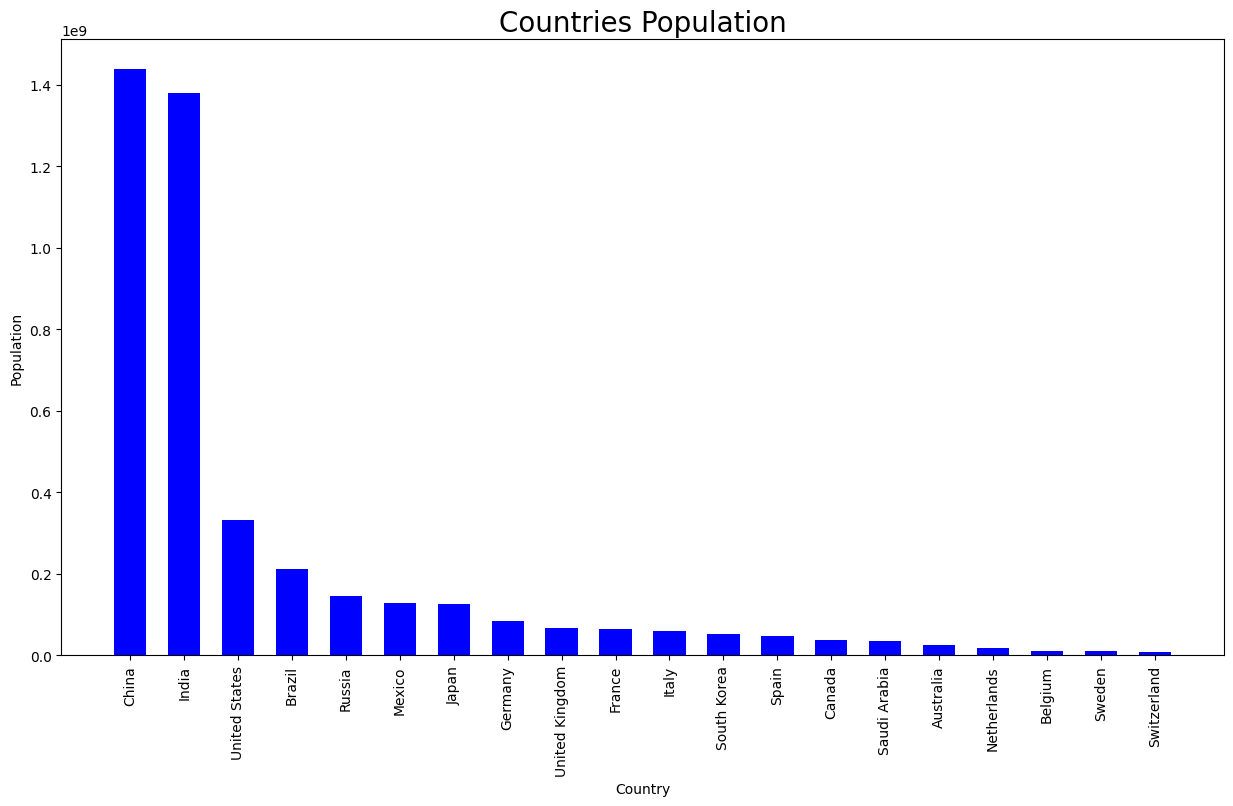

In [8]:
import matplotlib.pyplot as plt

merged_df.sort_values(by =["Population"], axis=0,
                      inplace=True,
                      ascending=False)

fig = plt.figure(figsize = (15, 8))
plt.bar(merged_df.Country, merged_df.Population,
        color = 'blue',
        width=0.6)

plt.xlabel("Country")
plt.ylabel("Population")
plt.xticks(rotation = 90)
plt.title("Countries Population", fontsize = 20)
plt.show()

4. Using NumPy, calculate the correlation between the 
population and GDP per capita for each country and create 
a scatter plot to visualize the relationship between the two 
variables (population and GDP per capita) using 
Matplotlib. 

In [9]:
import numpy as np 

population = merged_df["Population"]
gdp_per_capita = merged_df["GDP_per_capita"]
correlation = np.corrcoef(population, gdp_per_capita)
correlation

array([[ 1.        , -0.49159759],
       [-0.49159759,  1.        ]])

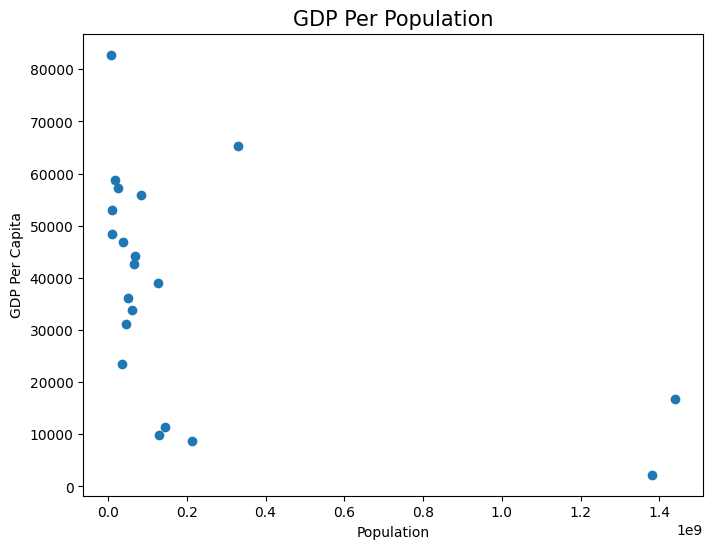

In [18]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
plt.scatter(population, gdp_per_capita)
plt.xlabel('Population')
plt.ylabel('GDP Per Capita')
plt.title("GDP Per Population", fontsize=15)
plt.show()


5. Using pandas, return a subset of the  top three countries 
with the lowest GDP. Assign this to a variable. 

In [12]:
df_low_gdp_3 = merged_df.sort_values(by="GDP_per_capita", ascending=True,
                      inplace=False).head(3)

df_low_gdp_3

,Country,Population,GDP_per_capita,Unemployment_rate,Area,Capital_City
16,India,1380004385,2252,6.10%,3287263,New Delhi
17,Brazil,212559417,8711,13.90%,8515767,Brasília
10,Mexico,128932753,9877,3.60%,1964375,Mexico City


6. Compare the unemployment rates of Switzerland, China, 
and the USA by plotting a bar plot of this data using 
Matplotlib. 

In [13]:
# Filtering the DataFrame for three countries 
countries = ["Switzerland", "China", "United States"]

filtered_df = merged_df.query("Country==@countries")
filtered_df

,Country,Population,GDP_per_capita,Unemployment_rate,Area,Capital_City
1,China,1439323776,16708,3.80%,9640011,Beijing
0,United States,331002651,65298,6.10%,9629091,"Washington, D.C."
13,Switzerland,8654622,82792,2.50%,41285,Bern


In [14]:
# cleaning the unemployment_rate column 
filtered_df["Unemployment_rate"] = filtered_df["Unemployment_rate"].str.replace("%", "").astype(float)
filtered_df

,Country,Population,GDP_per_capita,Unemployment_rate,Area,Capital_City
1,China,1439323776,16708,3.8,9640011,Beijing
0,United States,331002651,65298,6.1,9629091,"Washington, D.C."
13,Switzerland,8654622,82792,2.5,41285,Bern


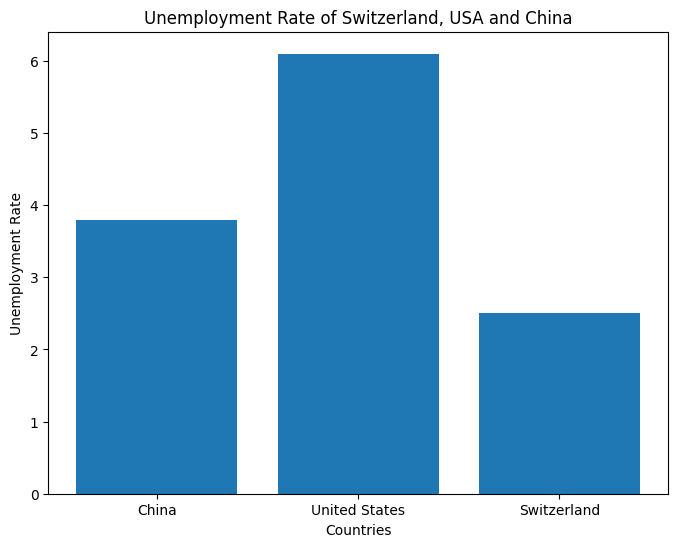

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(filtered_df.Country, filtered_df.Unemployment_rate)
plt.xlabel("Countries")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate of Switzerland, USA and China", fontsize=12)
plt.show()
